In [54]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import os 
from sklearn.decomposition import PCA

In [39]:
dir = "../features"
files = ["CE", "CP", "EPS1", "FS1", "FS2", "PS1", "PS2", "PS3", "PS4", "PS5", "PS6", "SE", "TS1", "TS2", "TS3", "TS4", "VS1"]

In [41]:
#Lecture des fichiers

def read_files(dir, file):
    return pd.read_csv(os.path.join(dir, file + ".txt"), sep='\t', header=None)


In [27]:
dataframes = {}  # Create an empty dictionary to store the DataFrames

for filename in files:
    dataframes[filename] = read_files(dir=dir, file=filename)

In [31]:
dataframes["TS1"].head()
#pressureFile1.shape[0]

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,35.570,35.492,35.469,35.422,35.414,35.320,35.227,35.242,35.160,35.176,...,36.008,35.984,35.996,36.039,36.008,36.008,36.094,36.102,36.090,36.152
1,36.156,36.094,35.992,36.008,35.992,35.902,35.824,35.820,35.727,35.727,...,37.328,37.324,37.340,37.332,37.316,37.410,37.418,37.422,37.488,37.477
2,37.488,37.391,37.340,37.312,37.223,37.145,37.059,36.973,36.898,36.879,...,38.457,38.461,38.457,38.469,38.469,38.555,38.527,38.543,38.527,38.621
3,38.633,38.535,38.469,38.379,38.297,38.223,38.125,38.062,37.977,37.969,...,39.441,39.363,39.367,39.457,39.461,39.461,39.473,39.441,39.453,39.461
4,39.461,39.461,39.375,39.281,39.203,39.113,39.043,38.969,38.875,38.883,...,40.324,40.320,40.312,40.340,40.320,40.387,40.391,40.391,40.387,40.391


In [43]:
TS1 = dataframes["TS1"]
TS1.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.00000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000
mean,45.511420,45.460717,45.400622,45.336808,45.276612,45.218042,45.166757,45.121327,45.078724,45.045597,...,45.573747,45.557226,45.54675,45.540769,45.539410,45.537794,45.534888,45.533562,45.531347,45.527454
std,8.025131,8.025665,8.018736,8.008237,7.998160,7.986921,7.973767,7.962258,7.950144,7.938532,...,7.990195,7.983875,7.98408,7.989100,7.995141,8.000784,8.007442,8.014366,8.018769,8.022338
min,35.398000,35.320000,35.250000,35.168000,35.148000,35.094000,35.082000,34.988000,34.988000,34.988000,...,35.414000,35.414000,35.41000,35.414000,35.398000,35.398000,35.398000,35.395000,35.402000,35.395000
25%,36.312000,36.238000,36.187000,36.160000,36.090000,36.020000,36.008000,36.000000,35.934000,35.926000,...,36.395000,36.344000,36.33200,36.328000,36.328000,36.328000,36.328000,36.320000,36.320000,36.316000
50%,44.863000,44.855000,44.781000,44.711000,44.684000,44.621000,44.617000,44.527000,44.461000,44.457000,...,45.020000,45.016000,44.94100,44.941000,44.949000,44.937000,44.937000,44.937000,44.937000,44.930000
75%,54.238000,54.148000,54.070000,54.000000,53.906000,53.828000,53.816000,53.734000,53.660000,53.656000,...,54.246000,54.246000,54.24200,54.242000,54.242000,54.242000,54.242000,54.242000,54.242000,54.238000
max,58.039000,57.953000,57.941000,57.863000,57.715000,57.641000,57.609000,57.527000,57.465000,57.383000,...,58.023000,58.047000,58.03100,57.965000,57.945000,57.957000,57.957000,57.973000,57.973000,58.023000


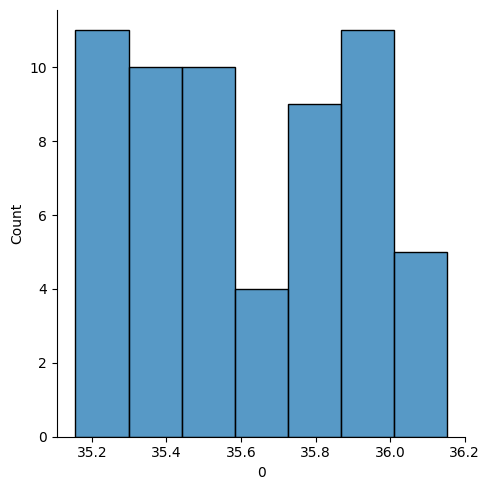

In [44]:
sns.displot(TS1.iloc[0])

In [47]:
#matrices de correlations
#combine data 
#ACP 
#standardize 
#Random forest classification multi-target 
#créer de nouvelles colonnes pour chaque catégorie 
#Métriques : Accuracy - F1-score -> classification , RMSE - R2 -> régression


# part 2 
# 1 Pipelines : ACP + standardize + prédiction 

In [51]:
sensor_data = pd.concat(dataframes.values(), axis=1)

In [125]:
labels = read_files(dir="../target", file="profile")

In [126]:
labels.head()

,0,1,2,3,4
0,3,100,0,130,1
1,3,100,0,130,1
2,3,100,0,130,1
3,3,100,0,130,1
4,3,100,0,130,1


In [127]:
labels = labels[[1]]
labels.loc[labels[1] < 100, "valveCondition"] = 0
labels.loc[labels[1] == 100, "valveCondition"] = 1
labels["valveCondition"] = labels["valveCondition"].astype("int64")

In [128]:
labels.loc[labels[1] != 100]

,1,valveCondition
211,73,0
212,73,0
213,73,0
214,73,0
215,73,0
...,...,...
2181,90,0
2182,90,0
2183,90,0
2184,90,0


Text(0.5, 1.0, 'PCA explained variance vs. n components')

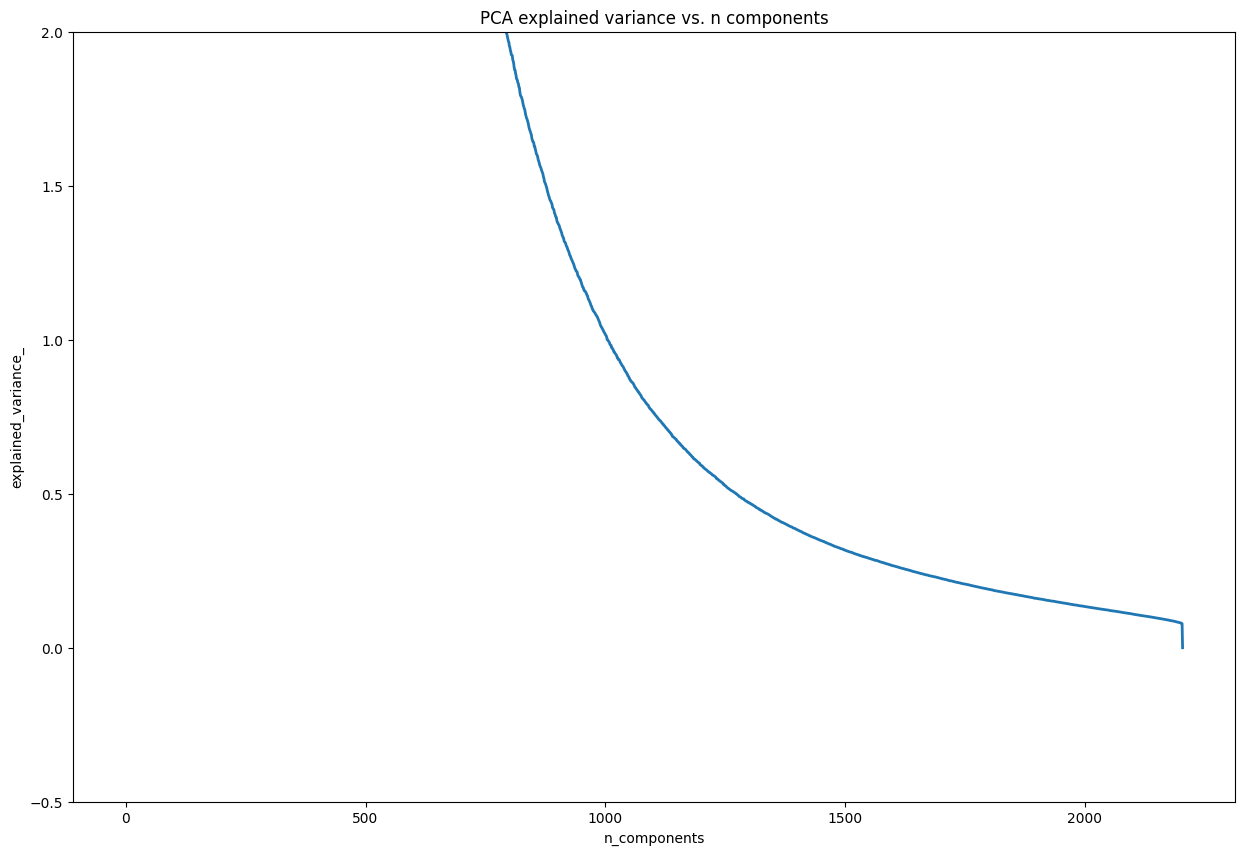

In [114]:
pca = PCA()
pca.fit(sensor_data)
plt.figure(figsize=(15, 10))
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')
plt.ylim(-0.5, 2)
plt.title('PCA explained variance vs. n components')

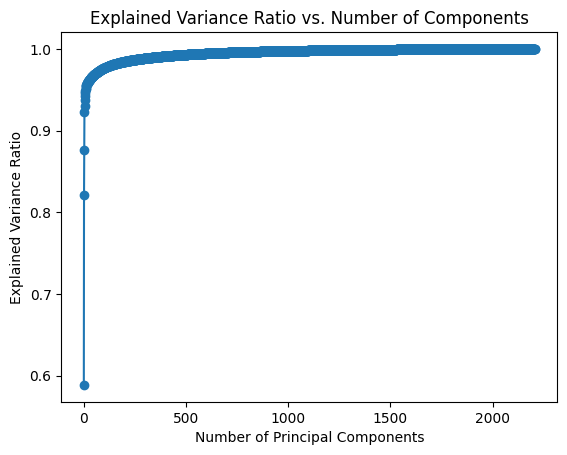

In [133]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(sensor_data)

# Apply PCA
pca = PCA()
pca.fit(standardized_data)

# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot explained variance ratio to help choose the number of components
import matplotlib.pyplot as plt
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio.cumsum(), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Components')
plt.show()


In [116]:
n_components = 200  

pca = PCA(n_components=n_components)
reduced_data = pca.fit_transform(standardized_data)


In [117]:
pd.DataFrame(reduced_data).head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,-131.911495,5.730017,56.635294,-92.880102,2.162674,20.790799,-1.674422,-1.559861,1.052762,-35.562544,...,0.822170,1.916576,-0.365656,2.852469,3.400918,0.723443,0.804795,0.717446,1.893982,-0.609626
1,-107.751468,-4.291306,51.248461,-82.721358,-5.054692,17.129746,6.667877,-2.049505,5.044791,-42.782061,...,-1.442254,2.150370,-0.147741,1.251425,1.677100,0.699019,-0.882341,-0.512957,-1.559727,-0.539482
2,-87.829885,-13.144525,45.073801,-74.915156,-11.403935,11.781055,7.227534,-0.350343,-0.099052,-24.443810,...,-0.442986,-0.505872,-1.114925,0.571191,-0.390662,0.816531,0.272757,1.982247,-0.462445,0.838014
3,-68.799974,-18.392718,43.028172,-65.915215,-13.913981,6.101824,7.057391,1.268847,-1.774402,-1.735435,...,1.353127,-0.861490,-0.823932,0.080103,1.406556,-0.065105,-0.686454,-0.503134,2.100488,-1.609895
4,-53.044233,-24.084111,38.583612,-58.563037,-12.548991,8.070167,7.102952,1.083395,3.547539,-27.774647,...,0.125184,-1.839649,-1.310984,2.186314,-1.092442,-1.317363,-1.086248,1.859321,1.100391,-0.492687


In [129]:
labels[:2000].values.ravel()

array([100,   1, 100, ...,   0,  80,   0])

In [132]:
from sklearn.ensemble import RandomForestClassifier

labels = labels[["valveCondition"]]

# Split the data into training and testing sets
X_train = reduced_data[:2000]
y_train = labels[:2000].values.ravel()
X_test = reduced_data[2000:]
y_test = labels[2000:].values.ravel()

# Initialize and train the Random Forest classifier
clf = RandomForestClassifier(verbose=1)
clf.fit(X_train, y_train)


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s


RandomForestClassifier(verbose=1)

In [131]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate and print metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


Accuracy: 0.975609756097561
Precision: 0.9857142857142858
Recall: 0.9452054794520548
F1 Score: 0.9650349650349651
